In [1]:
# -*- coding:UTF-8 -*- ＃
# 导入模块
import sys
import time
import random
import numpy as np
import matplotlib.pyplot as plt

import pydotplus 
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler

import mymodule as MYD

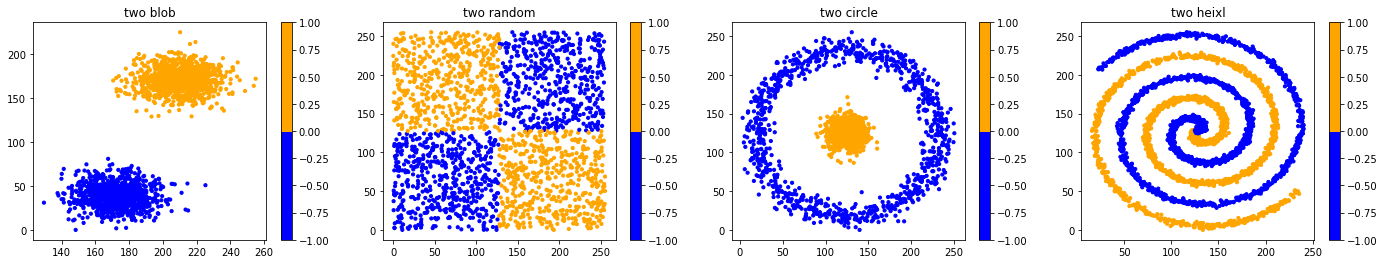

In [2]:
n_samples=2000
XB,yb=MYD.makeblods(n_samples)
XR,yr=MYD.makerandoms(n_samples)
XC,yc=MYD.makecircles(n_samples)
XH,yh=MYD.makeHelixs(n_samples)
XAS = [XB, XR, XC,XH]
YAS=[yb,yr,yc,yh]

cor = ListedColormap(['Blue', 'Orange'])
titlename=['two blob','two random','two circle','two heixl']
cmap=[cor,cor,cor,cor]
MYD.DrawManyChart(XAS,YAS,cmap,24,4,titlename,10,1,4)

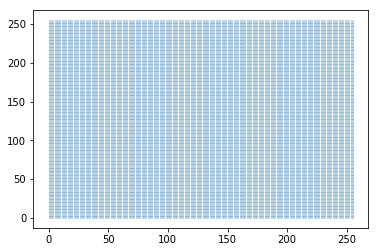

(65536,)

In [3]:
Xzip,points=MYD.makeGrids()
plt.figure()
plt.scatter(points[:,0],points[:,1],s=0.009)
plt.show()

points[:,0].shape

[0.90800000000000003]


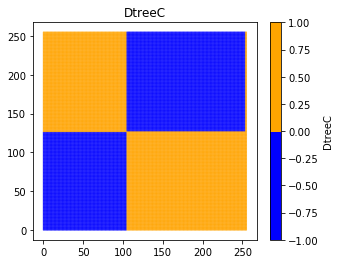

In [4]:
cor = ListedColormap(['Blue', 'Orange'])

lableDTR=[]; scoreDTR=[];
L=len(points); a=1
number_of_points = int(a*L)
p = points[0:number_of_points]

DI=1
modelDTR=tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
tempmodule=modelDTR.fit(XAS[DI],YAS[DI])
lableDTR.append(tempmodule.predict(p))
scoreDTR.append(tempmodule.score(XAS[DI],YAS[DI]))
       
print(scoreDTR);
MYD.DrawChartColorBar(p,lableDTR,cor,5,4,'DtreeC','DtreeC')

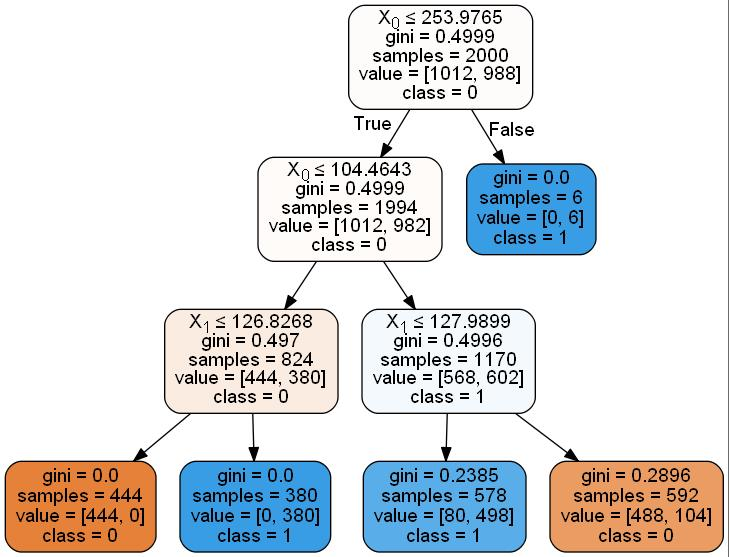

In [5]:
dot_data = tree.export_graphviz(tempmodule, out_file=None,class_names="01",label='all',filled=True,rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.write_pdf("Helixs.pdf"))
Image(graph.create_jpg())

In [6]:
treeobject=modelDTR.tree_
treeclass=modelDTR.classes_
featureimportance=modelDTR.feature_importances_
getparams=modelDTR.get_params(deep=True)
applyDTR=modelDTR.apply(p)
Decisionpath=modelDTR.decision_path(XAS[DI],check_input=True)
# print(treeobject)

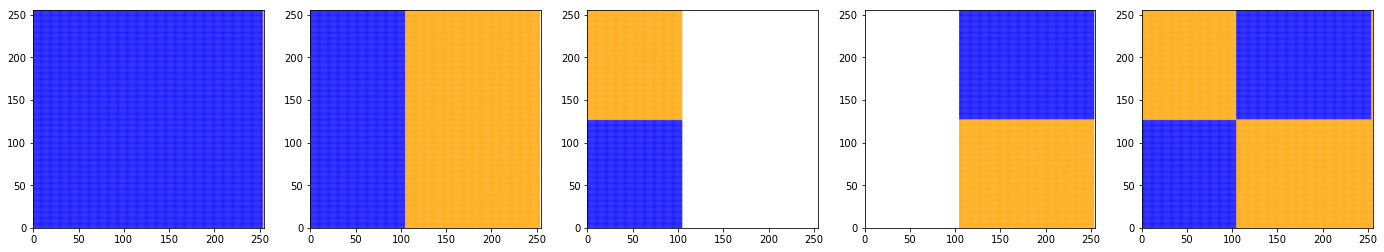

In [7]:
label=[]; pointR=[]; pointL=[];
for k in range(0,len(p)):
    if(points[k][0]<=253.9763):
        label.append(0)
        pointL.append(p[k])
    else:
        label.append(1)
        pointR.append(p[k])

pointL=np.array(pointL); 
label2=[];    pointR2=[]; pointL2=[];    
for j in range(0,len(pointL)):
    if(pointL[j][0]<=104.4643):
        label2.append(0)
        pointL2.append(pointL[j])
    else:
        label2.append(1)
        pointR2.append(pointL[j])

pointL2=np.array(pointL2); pointR2=np.array(pointR2);       
label31=[];     label32=[];     
for m in range(0,len(pointL2)):
    if(pointL2[m][1]<=126.8268):
        label31.append(0)
    else:
        label31.append(1)
        
for n in range(0,len(pointR2)):
    if(pointR2[n][1]<=127.9898):
        label32.append(1)
    else:
        label32.append(0)

labelAll=[]; 
for k in range(0,len(points)):
    if(((points[:,0][k]<=104.4643) and (points[:,1][k]<=126.8268)) or (((points[:,0][k]>104.4643) and (points[:,0][k]<=253.9763)) and ((points[:,1][k]>127.9898) and (points[:,1][k]<=255)))):
        labelAll.append(0)
    else:
        labelAll.append(1)
        
plt.figure(figsize=(24,4))
plt.subplot(151)
plt.xlim(0,255);  plt.ylim(0,255);
plt.scatter(p[:,0], p[:,1], c=label,s=0.1,cmap=cor)
plt.subplot(152)
plt.xlim(0,255);  plt.ylim(0,255);
plt.scatter(pointL[:,0], pointL[:,1], c=label2,s=0.1,cmap=cor)
plt.subplot(153)
plt.xlim(0,255);  plt.ylim(0,255);
plt.scatter(pointL2[:,0], pointL2[:,1], c=label31,s=0.1,cmap=cor)
plt.subplot(154)
plt.xlim(0,255);  plt.ylim(0,255);
plt.scatter(pointR2[:,0], pointR2[:,1], c=label32,s=0.1,cmap=cor)
plt.subplot(155)
plt.xlim(0,255);  plt.ylim(0,255);
plt.scatter(points[:,0], points[:,1], c=labelAll,s=0.1,cmap=cor)
plt.show()

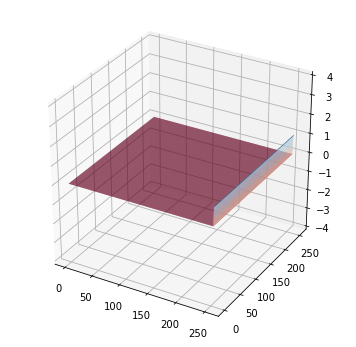

In [8]:
plt.figure(figsize=(6,6))

cm_bright = ListedColormap(['Blue','White' ,'Orange'])
cm = plt.cm.get_cmap('RdBu')
##C0 = np.array(label32)+np.array(label31)+np.array(label)+0.5*(np.array(label)+np.array(label2))
C0 = label
ax =plt.subplot(111,projection='3d')
ax.plot_trisurf(p[:,0],p[:,1],C0,cmap=cm)
ax.set_zlim(-4,4)
plt.show()

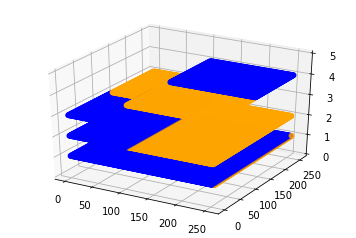

In [9]:
Z=[]; Z1=[]; Z2=[]; Z3=[];
for z in range(0,len(label)):
    Z.append(1); 
    
for j in range(0,len(label2)):
    Z1.append(2);

for m in range(0,len(label31)):
    Z2.append(3);
    
for n in range(0,len(label32)):
    Z3.append(4); 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(points[:,0], points[:,1], Z,c=label,cmap=cor)
ax.scatter3D(pointL[:,0], pointL[:,1], Z1,c=label2,cmap=cor)
ax.scatter3D(pointL2[:,0], pointL2[:,1], Z2,c=label31,cmap=cor)
ax.scatter3D(pointR2[:,0], pointR2[:,1], Z3,c=label32,cmap=cor)
ax.set_zlim(0,5)
plt.show();

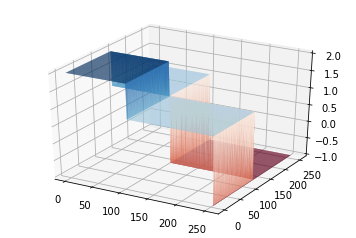

In [10]:
Zvalue=[];
for k in range(0,len(points)):
    if(points[k][0]<=253.9763):
        if(points[k][0]<=104.4643):
            if(points[k][1]<=126.8268):
                Zvalue.append(2)
            else:
                Zvalue.append(1)
        else:
            if(points[k][1]<=127.9898):
                Zvalue.append(1)
            else:
                Zvalue.append(-1)            
    else:
        Zvalue.append(-1);
        
fig = plt.figure()
cm_bright = ListedColormap(['Blue','Orange'])
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(points[:,0],points[:,1],Zvalue,cmap=cm)
plt.show()

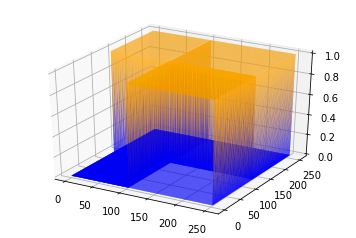

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], label,cmap=cor)
ax.plot_trisurf(pointL[:,0], pointL[:,1], label2,cmap=cor)
ax.plot_trisurf(pointL2[:,0], pointL2[:,1], label31,cmap=cor)
ax.plot_trisurf(pointR2[:,0], pointR2[:,1], label32,cmap=cor)
plt.show();

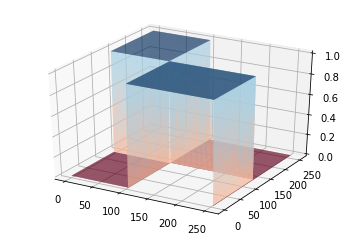

In [12]:
Zvalue=[];
for k in range(0,len(points)):
    if(points[k][0]<=253.9763):
        if(points[k][0]<=104.4643):
            if(points[k][1]<=126.8268):
                Zvalue.append(0)
            else:
                Zvalue.append(1)
        else:
            if(points[k][1]<=127.9898):
                Zvalue.append(1)
            else:
                Zvalue.append(0)            
    else:
        Zvalue.append(1);
        
fig = plt.figure()
cm_bright = ListedColormap(['Blue','Orange'])
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(points[:,0],points[:,1],Zvalue,cmap=cm)
plt.show()